In [107]:
import pandas as pd
import numpy as np
import seaborn as sns

In [54]:
edges_small = pd.read_csv('../data/mst_real_edges_small.csv')
edges_big = pd.read_csv('../data/mst_real_edges_big.csv')

In [55]:
edges_small.head(2)

,node1,node2,dist,real_dist
0,Angarsk,Irkutsk,0.005037,45151.0
1,Armavir,Sochi,0.021116,371442.0


In [56]:
from math import pi

In [57]:
def rad_to_mm(r):
    return r / pi * 180 * 111 * 1000

In [58]:
edges_small['dist'] = edges_small['dist'].apply(rad_to_mm)
edges_big['dist'] = edges_big['dist'].apply(rad_to_mm)

In [59]:
def nan(r):
    if np.isnan(r['real_dist']):
        return r['dist']
    return r['real_dist']

In [60]:
edges_small['real_dist'] = edges_small.apply(nan, axis=1)
edges_big['real_dist'] = edges_big.apply(nan, axis=1)

#### Saved distance in m

In [93]:
max_dist = max(edges_small['real_dist'])
max_dist

2092914.0

In [91]:
diff_sum = sum(edges_small['real_dist'] - edges_small['dist'])
diff_sum

12107257.711834975

In [105]:
diffs = edges_small['real_dist'] - edges_small['dist']

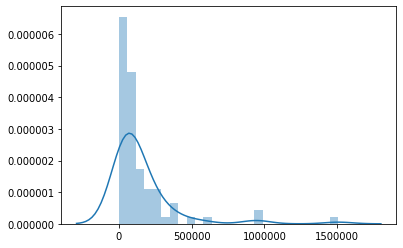

In [110]:
sns.distplot(diffs);

In [159]:
import folium

def make_map(edges, coord, file_name, postfix, markers=False):
    m = folium.Map(
        location=[61.254035, 73.396221],
        zoom_start=3,
        tiles='CartoDB positron'
    )
    max_dist = max(edges['real_dist'])
    diff_sum = sum(edges['real_dist'] - edges['dist'])
    diff_max = max(edges['real_dist'] - edges['dist'])

    used = dict()
    for (_, edge) in edges.iterrows():
        city1, city2 = edge['node1'], edge['node2']
        p1, p2 = coord[city1], coord[city2]
        diff = edge['real_dist'] - edge['dist']
        if (diff < 0):
            diff = 0
        opacity = (0.2+diff**(1.1)/diff_max)
        popup = '{}-{}\nReal dist: {}\n Line length: {} (in km)'.format(city1,
                city2, edge['real_dist']/ 1000,edge['dist']/ 1000)
        folium.PolyLine([p1, p2], popup=popup, opacity=opacity).add_to(m)
        if markers:
            if (city1 not in used):
                used[city1] = 0
                folium.Marker([p1[0], p1[1]], popup=city1,
                              icon=folium.Icon(icon='circle')).add_to(m)
            if (city2 not in used):
                used[city2] = 0
                folium.Marker([p2[0], p2[1]], popup=city2,
                              icon=folium.Icon(icon='circle')).add_to(m)

    if markers:
        file_name += '_markers'
    m.save('../maps/'+file_name+postfix+'.html')
    print(file_name+postfix+'.html')
    return m

In [ ]:
cities = pd.read_csv('../data/ru_lat_lng_clear.csv')

coord = dict()
for (_, city) in cities.iterrows():
    coord[city['name']] = (city['lat'], city['lng'])

make_map(edges_small, coord, 'comparison'+'_map', '_v2')
make_map(edges_small, coord, 'comparison'+'_map', '_v2', True)
make_map(edges_big, coord, 'comparison'+'_map', '_v1')
make_map(edges_big, coord, 'comparison'+'_map', '_v1', True)

comparison_map_v2.html
comparison_map_markers_v2.html
comparison_map_v1.html
comparison_map_markers_v1.html
